In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## import the datasets and merge them

In [7]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data=pd.read_csv("D://Bootcamp/19-Recommender-Systems/u.data.csv",sep="\t", names=column_names)


In [8]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [11]:
movie_id=pd.read_csv("D://Bootcamp/19-Recommender-Systems/Movie_Id_Titles.csv")

In [12]:
movie_id.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
df= pd.merge(data,movie_id, on="item_id")

In [14]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## exploratory data analysis

In [15]:
sns.set_style("whitegrid")

In [22]:
df.groupby(['title'])['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [34]:
df['num_of_ratings']=df['title'].value_counts()
movies=pd.DataFrame(df.groupby('title')['rating'].mean())
movies['num_of_ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [36]:
movies.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:xlabel='num_of_ratings', ylabel='Count'>

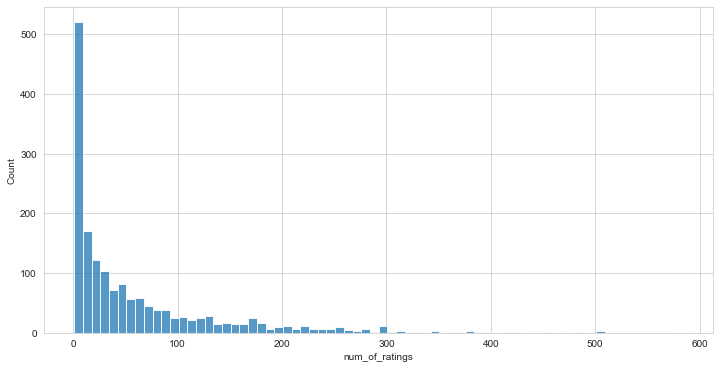

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(movies['num_of_ratings'],bins=70)

<AxesSubplot:xlabel='rating', ylabel='Count'>

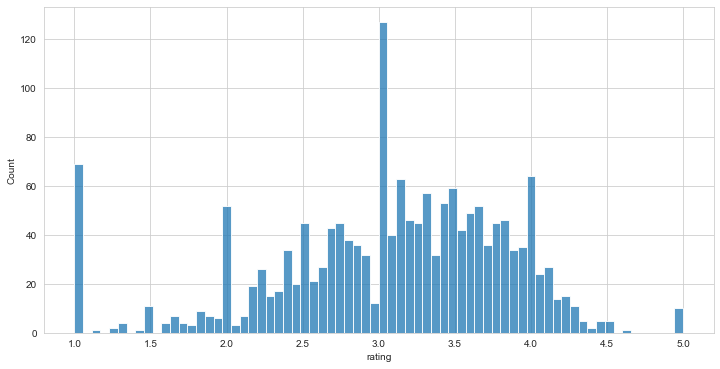

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(movies['rating'],bins=70)

<Figure size 864x432 with 0 Axes>

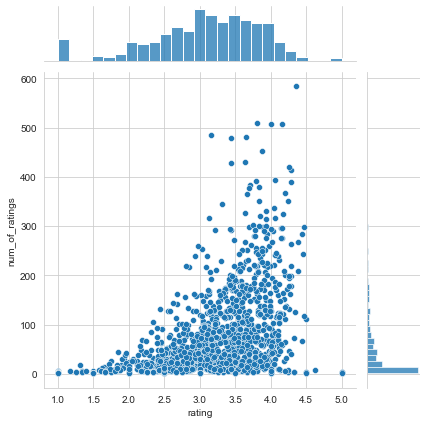

In [45]:
plt.figure(figsize=(12,6))
sns.jointplot(x='rating',y='num_of_ratings',data=movies)

## pivot table and recommender system

In [49]:
table=pd.pivot_table(index='user_id',columns='title',values='rating', data=df)

In [51]:
table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
movies.sort_values('num_of_ratings', ascending=False).head()

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


<AxesSubplot:>

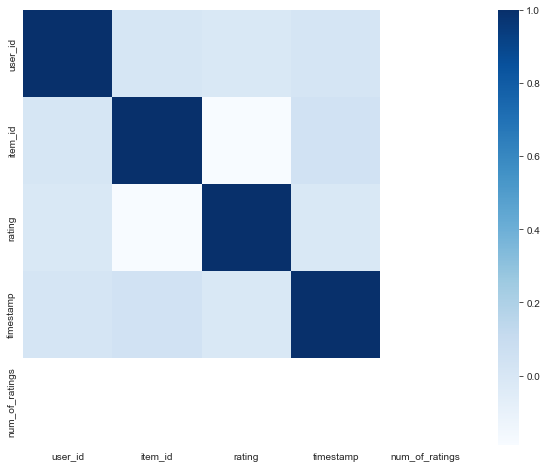

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='Blues')

<AxesSubplot:xlabel='title', ylabel='user_id'>

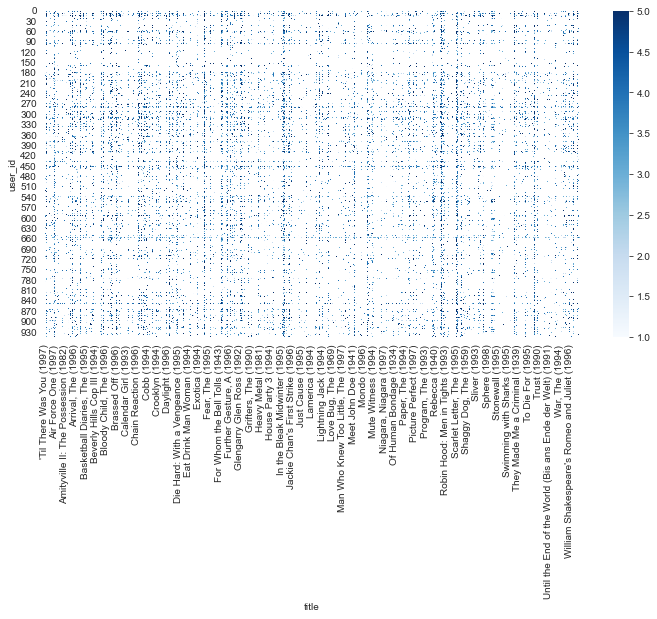

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(table, cmap="Blues")

## movies similar to Starwars(1997)

In [87]:
starwars_user_ratings= table['Star Wars (1977)']
contact_user_ratings=table['Contact (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [88]:
similar_to_starwars=table.corrwith(starwars_user_ratings)
starwars_corr= pd.DataFrame(similar_to_starwars, columns=['Correlation'])


C:\Users\Raghu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Raghu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [89]:
starwars_corr.sort_values(ascending=False,by='Correlation').head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [90]:
# we need to eliminate the movies which have very less number of ratings so that the data is not skewed
# towards low value_counts in ratings

starwars_corr=starwars_corr.join(movies['num_of_ratings'])
starwars_corr.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [105]:
starwars_corr[starwars_corr['num_of_ratings']>100].sort_values(ascending=False, by='Correlation').head()

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [ ]:
# Starwars sequels are the most recommended, followed by Indiana Jones 

In [94]:
contact_user_ratings.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

## movies similar to "Contact(1997)"

In [99]:
contact_similar_movies=table.corrwith(table['Contact (1997)'])
contact_corr=pd.DataFrame(contact_similar_movies, columns=['Correlation'])

In [100]:
contact_corr.head()

,Correlation
title,
'Til There Was You (1997),0.904534
1-900 (1994),NaN
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512


In [101]:
contact_corr=contact_corr.join(movies['num_of_ratings'])

In [102]:
contact_corr.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.904534,9
1-900 (1994),NaN,5
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41


In [104]:
contact_corr[contact_corr['num_of_ratings']>100].sort_values(ascending=False, by='Correlation').head()

,Correlation,num_of_ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136


In [106]:
# Philadelphia and Mask are the most recommended movies